In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')
data_copy['market_value'] = data_copy.ftse

In [3]:
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

In [4]:
data_copy['returns'] = data_copy.market_value.pct_change(1)*100

In [5]:
arima_model_1_1_1 = ARIMA(data_copy.market_value,order = (1,1,1))
arima_model_1_1_1_fit = arima_model_1_1_1.fit()
arima_model_1_1_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.643
Method:                       css-mle   S.D. of innovations             58.269
Date:                Thu, 06 Aug 2020   AIC                          68843.285
Time:                        10:40:55   BIC                          68870.263
Sample:                    01-10-1994   HQIC                         68852.633
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6751      0.581      1.162      0.245      -0.463       1.814
ar.L1.D.market_value     0.8355      0.078     10.777      0.000       0.684       0.987
ma.L1.D.market_value    -0.8701      0.070    -12.463      0.000      -1.007      -0.733
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1969           +0.0000j            1.1969            0.0000
MA.1            1.1492           +0.0000j            1.1492            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
data_copy['residual'] = arima_model_1_1_1_fit.resid

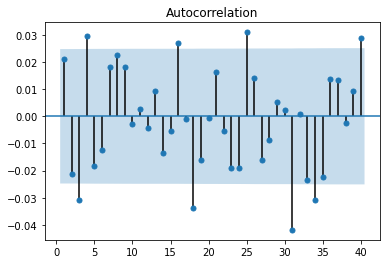

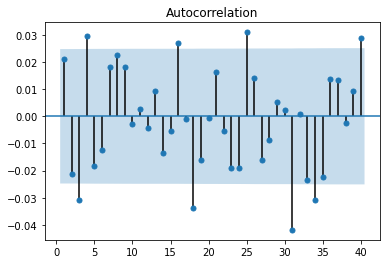

In [14]:
sgt.plot_acf(data_copy.residual[1:],zero = False,lags = 40)

### Fitting higher lag ARIMA models

In [15]:
arima_model_1_1_2 = ARIMA(data_copy.market_value,order = (1,1,2))
arima_model_1_1_2_fit = arima_model_1_1_2.fit()
#arima_model_1_1_1_fit.summary()
arima_model_1_1_3 = ARIMA(data_copy.market_value,order = (1,1,3))
arima_model_1_1_3_fit = arima_model_1_1_3.fit()
arima_model_2_1_1 = ARIMA(data_copy.market_value,order = (2,1,1))
arima_model_2_1_1_fit = arima_model_2_1_1.fit()
arima_model_3_1_1 = ARIMA(data_copy.market_value,order = (3,1,1))
arima_model_3_1_1_fit = arima_model_3_1_1.fit()
arima_model_3_1_2 = ARIMA(data_copy.market_value,order = (3,1,2))
arima_model_3_1_2_fit = arima_model_3_1_2.fit(start_ar_lags = 5)

In [16]:
print('ARIMA(1,1,1) LLR = ',arima_model_1_1_1_fit.llf,"AIC = ",arima_model_1_1_1_fit.aic)
print('ARIMA(1,1,2) LLR = ',arima_model_1_1_2_fit.llf,"AIC = ",arima_model_1_1_2_fit.aic)
print('ARIMA(1,1,3) LLR = ',arima_model_1_1_3_fit.llf,"AIC = ",arima_model_1_1_3_fit.aic)
print('ARIMA(2,1,1) LLR = ',arima_model_2_1_1_fit.llf,"AIC = ",arima_model_2_1_1_fit.aic)
print('ARIMA(3,1,1) LLR = ',arima_model_3_1_1_fit.llf,"AIC = ",arima_model_3_1_1_fit.aic)
print('ARIMA(3,1,2) LLR = ',arima_model_3_1_2_fit.llf,"AIC = ",arima_model_3_1_2_fit.aic)

ARIMA(1,1,1) LLR =  -34417.64256895482 AIC =  68843.28513790964
ARIMA(1,1,2) LLR =  -34413.6633171684 AIC =  68837.3266343368
ARIMA(1,1,3) LLR =  -34410.78126377603 AIC =  68833.56252755206
ARIMA(2,1,1) LLR =  -34413.518374977095 AIC =  68837.03674995419
ARIMA(3,1,1) LLR =  -34412.28349443462 AIC =  68836.56698886924
ARIMA(3,1,2) LLR =  -34410.795902261976 AIC =  68835.59180452395


model (1,1,3) has low AIC and high LLR value

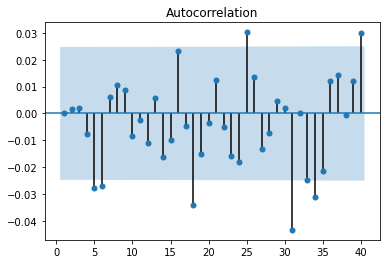

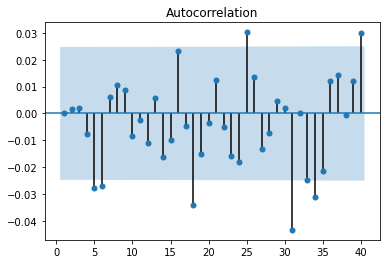

In [17]:
data_copy['residual'] = arima_model_1_1_3_fit.resid
sgt.plot_acf(data_copy.residual[1:],zero = False,lags = 40)

In [19]:
arima_model_5_1_1 = ARIMA(data_copy.market_value,order = (5,1,1))
arima_model_5_1_1_fit = arima_model_5_1_1.fit()


In [20]:
data_copy['arima_511_residuals'] = arima_model_5_1_1_fit.resid

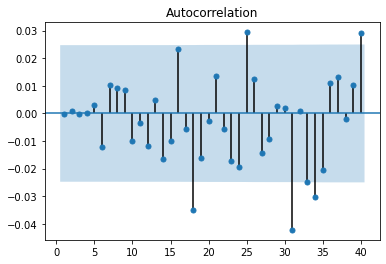

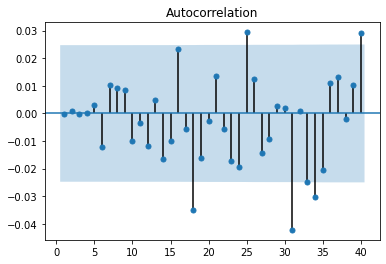

In [21]:
sgt.plot_acf(data_copy.arima_511_residuals[1:],zero = False,lags = 40)

### Fitting ARIMAX
ARIMAX is used when there are other variables in the dataset that can affect the output.

In [18]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')
data_copy['market_value'] = data_copy.ftse


In [19]:
data_copy.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [20]:
arimax_1_1_1 = ARIMA(data_copy.market_value,order = (1,1,1),exog = data_copy.spx)

In [21]:
arimax_1_1_1_fit = arimax_1_1_1.fit()

In [22]:
arimax_1_1_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.384
Method:                       css-mle   S.D. of innovations             58.267
Date:                Thu, 06 Aug 2020   AIC                          68844.768
Time:                        10:48:30   BIC                          68878.490
Sample:                    01-10-1994   HQIC                         68856.452
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4087      1.653     -0.247      0.805      -3.648       2.830
spx                      0.0008      0.001      0.703      0.482      -0.002       0.003
ar.L1.D.market_value     0.8336      0.078     10.737      0.000       0.681       0.986
ma.L1.D.market_value    -0.8683      0.070    -12.401      0.000      -1.006      -0.731
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1996           +0.0000j            1.1996            0.0000
MA.1            1.1517           +0.0000j            1.1517            0.0000
-----------------------------------------------------------------------------
"""

### Incorporating Seasonality - SARIMAX model
[P,D,Q,s]

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model_sarimax = SARIMAX(data_copy.market_value,order = (1,0,1),seasonal_order = (2,0,1,5),exog = data_copy.spx)

In [25]:
model_sarimax_fit = model_sarimax.fit()

..\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33290.236
Date:                           Thu, 06 Aug 2020   AIC                          66594.472
Time:                                   10:56:33   BIC                          66641.684
Sample:                               01-07-1994   HQIC                         66610.830
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5718      0.031     82.796      0.000       2.511       2.633
ar.L1          0.9999      0.000   3591.393      0.000       0.999       1.000
ma.L1         -0.2814      0.009    -32.217      0.000      -0.299      -0.264
ar.S.L5        0.9740      0.004    237.782      0.000       0.966       0.982
ar.S.L10       0.0259      0.002     11.844      0.000       0.022       0.030
ma.S.L5       -0.9997      0.005   -182.839      0.000      -1.010      -0.989
sigma2      2377.0529     24.570     96.747      0.000    2328.897    2425.209
===================================================================================
Ljung-Box (Q):                       92.68   Jarque-Bera (JB):              4523.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""